Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

#  IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


In [3]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Incluye el link al archivo CSV donde has almacenado tu dataset

creditcard_df = pd.read_csv('/content/drive/MyDrive/Cursos/Data Scientist/Udemy/Data Science aplicado a Negocios/Data Science for Business Package/2. Marketing Department/Marketing_data.csv')

# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()
# El balance medio es $1564
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Vamos a investigar quien ha hecho una compra de $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZACIÓN DEL DATASET

In [10]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
creditcard_df.isnull().sum()  #Verificamos con .ismull().sum() si hay datos faltantes y observamos que si

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
creditcard_df[creditcard_df['MINIMUM_PAYMENTS'].isnull()] #Vemos los datos faltantes

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [13]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] # Observamos que ahora no tenemos datos faltantes

Series([], Name: MINIMUM_PAYMENTS, dtype: float64)

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT']

5203   NaN
Name: CREDIT_LIMIT, dtype: float64

In [16]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [17]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT']# Observamos que ahora no tenemos datos faltantes

Series([], Name: CREDIT_LIMIT, dtype: float64)

In [18]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos
creditcard_df.duplicated().sum()

0

In [19]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [20]:
creditcard_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
n = len(creditcard_df.columns) # Comprobamos el número de columnas
n

17

In [22]:
creditcard_df.columns # Comprobamos los nombres de las columnas

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

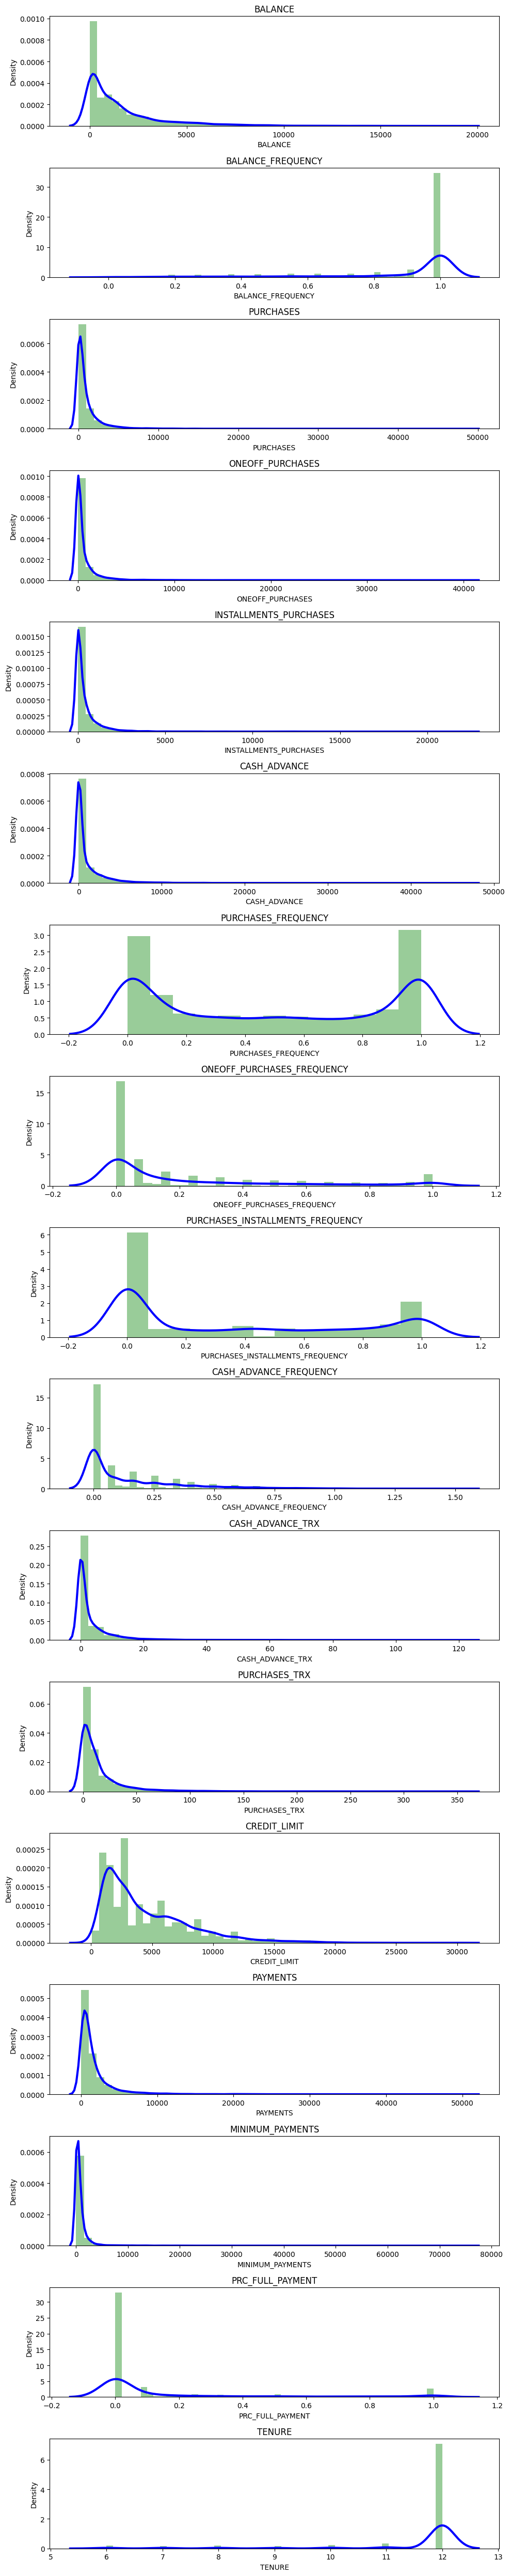

In [23]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua.
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua.

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


plt.figure(figsize=(10,50))
for i in range(n):
  plt.subplot(n, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

#Esta versiion es la dada por el porfe en el curso, la funsion distplot ya no se utiliza, se ignoraron los warnings


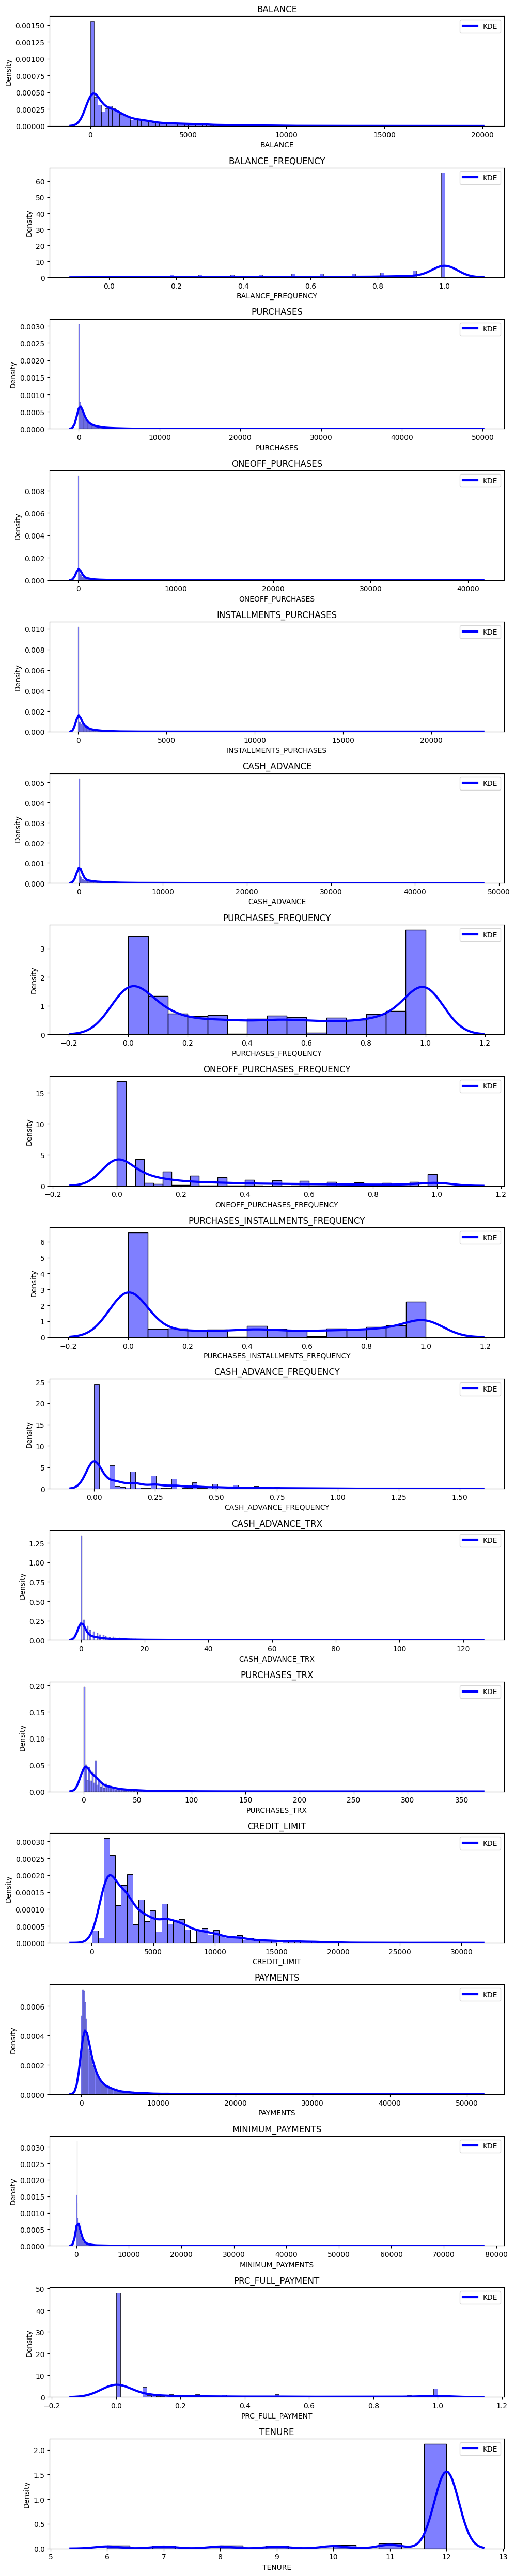

In [24]:
plt.figure(figsize=(10, 50))
for i in range(n):
    ax = plt.subplot(n, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, stat='density', kde_kws=dict(cut=3),
                 color='b', line_kws={'lw': 3, 'label': 'KDE'}, alpha=0.5)
    ax.set_title(creditcard_df.columns[i])
    #ax.hist(creditcard_df[creditcard_df.columns[i]], color='g')
    ax.legend(['KDE'])

plt.tight_layout()
plt.show()

# Se remplaza la funsión distplot por la histplot ya que la distplot de descontinuo
# link de como usarla https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

In [25]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'

In [26]:
#Verificamos la correlación entre las variables

correlations = creditcard_df.corr()

<Axes: >

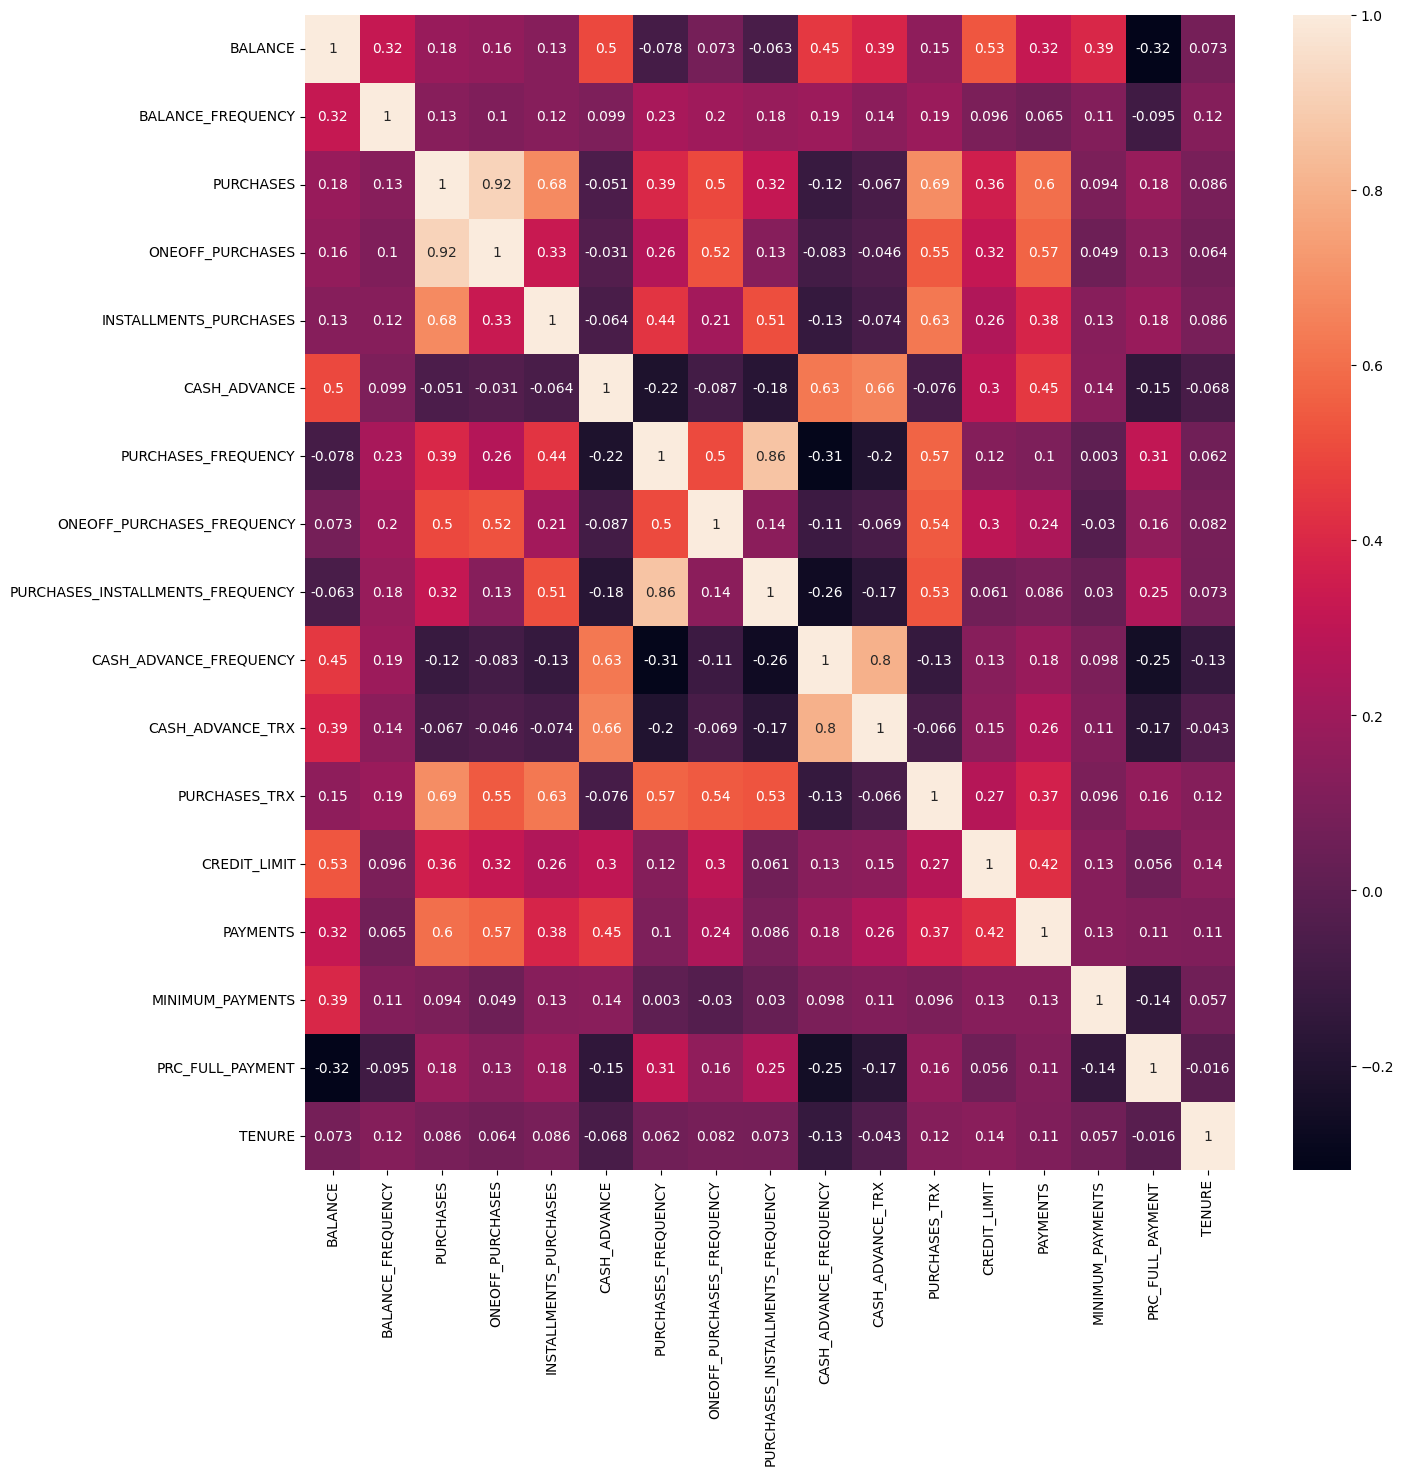

In [27]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True)
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments.
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'BALANCE'),
  Text(2, 0, 'BALANCE_FREQUENCY'),
  Text(3, 0, 'PURCHASES'),
  Text(4, 0, 'ONEOFF_PURCHASES'),
  Text(5, 0, 'INSTALLMENTS_PURCHASES'),
  Text(6, 0, 'CASH_ADVANCE'),
  Text(7, 0, 'PURCHASES_FREQUENCY'),
  Text(8, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(9, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(11, 0, 'CASH_ADVANCE_TRX'),
  Text(12, 0, 'PURCHASES_TRX'),
  Text(13, 0, 'CREDIT_LIMIT'),
  Text(14, 0, 'PAYMENTS'),
  Text(15, 0, 'MINIMUM_PAYMENTS'),
  Text(16, 0, 'PRC_FULL_PAYMENT'),
  Text(17, 0, 'TENURE')])

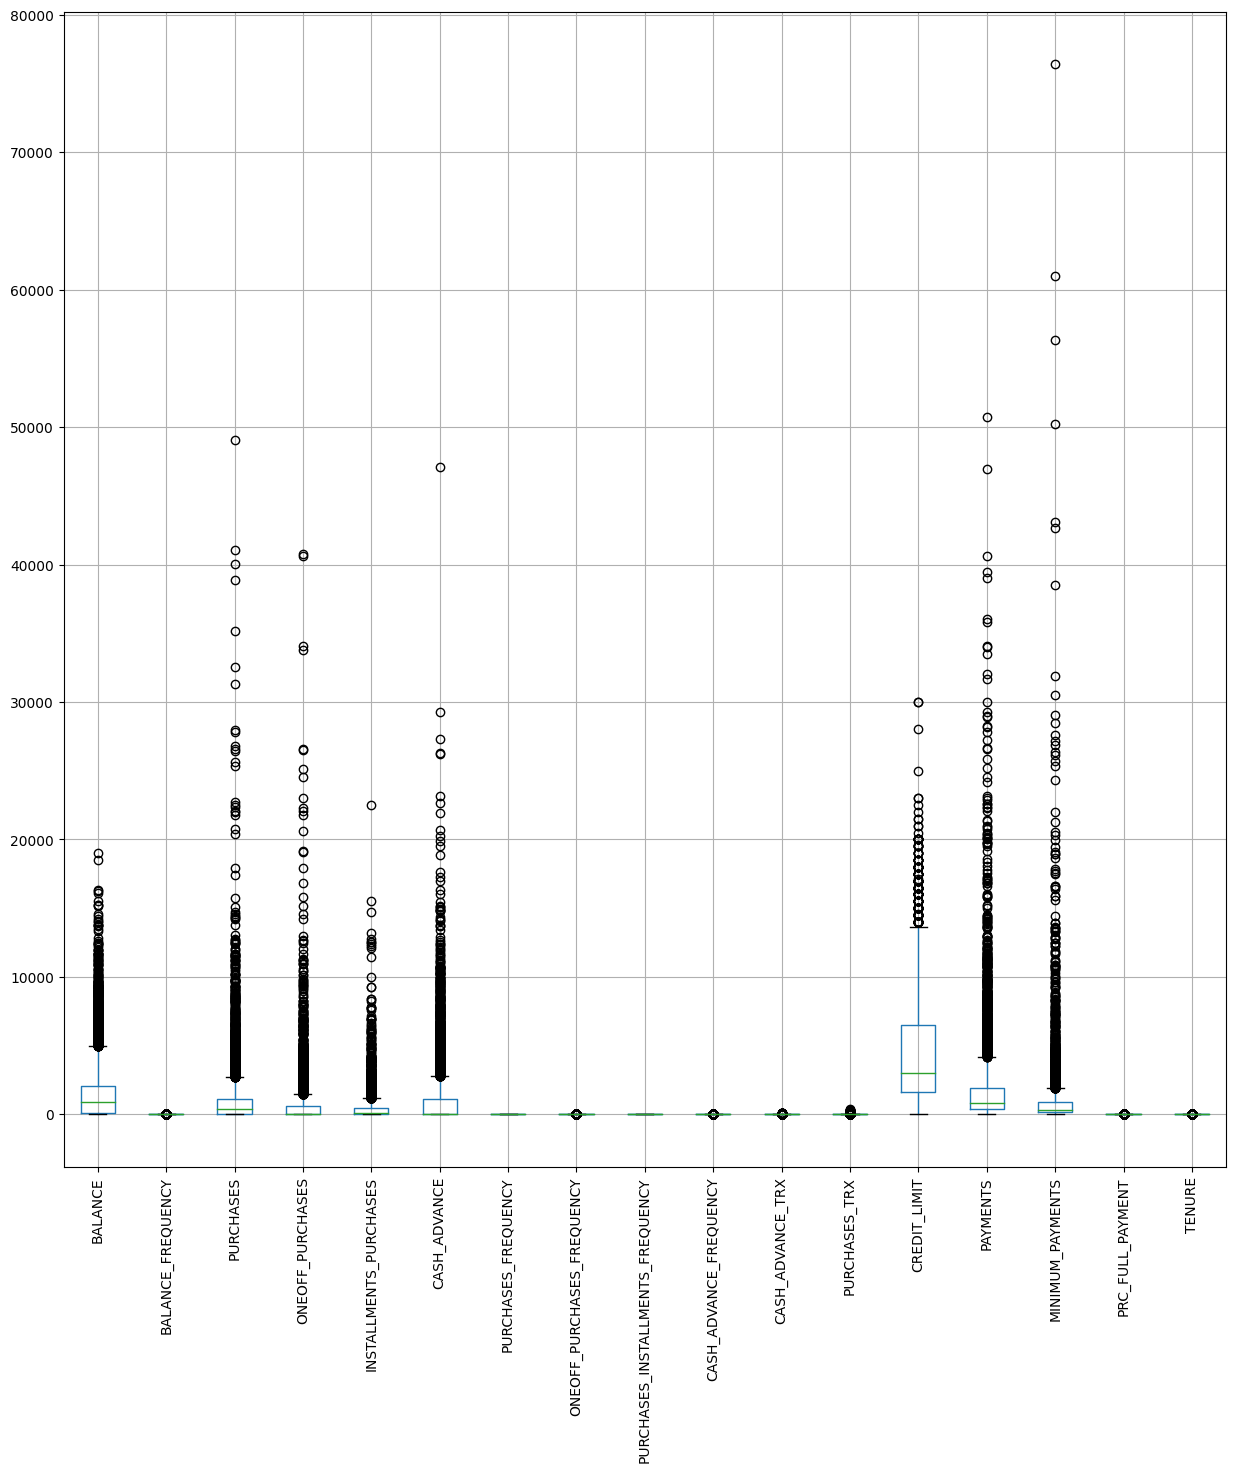

In [28]:
plt.figure(figsize=(15, 15))
creditcard_df.boxplot()
plt.xticks(rotation=90)

# Visualizamos que tantos outliers hay en los datos

In [29]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [30]:
creditcard_df_scaled.shape

(8950, 17)

In [31]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [32]:
creditcard_df_scaleddf = pd.DataFrame(data = creditcard_df_scaled, columns = creditcard_df.columns)

In [33]:
creditcard_df_scaleddf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


# APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES - PCA - Y VISUALIZAR LOS RESULTADOS

In [34]:
# Obtenemos las componentes principales
pca = PCA()
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026e+00, -1.07645061e+00,  4.88506522e-01, ...,
         1.51265232e-01,  4.84606264e-02, -1.61124288e-04],
       [-1.13829490e+00,  2.50647666e+00,  6.01212326e-01, ...,
        -5.32022203e-01, -8.28866189e-02,  3.00053022e-06],
       [ 9.69684015e-01, -3.83520301e-01,  1.02371379e-01, ...,
         2.22568714e-01,  5.11446435e-01,  2.18614634e-05],
       ...,
       [-9.26203638e-01, -1.81078560e+00, -4.74723055e-01, ...,
         4.61540324e-01,  1.57972324e-01, -1.63602147e-04],
       [-2.33655167e+00, -6.57966015e-01,  9.74725121e-01, ...,
         2.63541958e-01, -1.89518950e-01, -8.60462734e-05],
       [-5.56422165e-01, -4.00467124e-01,  1.01519557e+00, ...,
        -4.16874027e-01,  3.57907951e-01, -7.51773744e-05]])

In [35]:
# Verificamos la varianza de cada variable

var = pca.explained_variance_ratio_
var

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

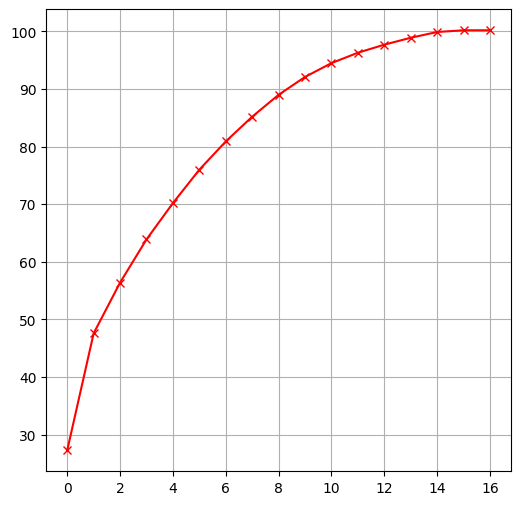

In [36]:
cum_var = np.cumsum(np.round(var, decimals=3)*100)
plt.figure(figsize=(6, 6))
plt.plot(cum_var, 'r-x')
plt.grid(True)

#Aqui podemos ver que con la suma acumulada, ya las primeras 9 variables se optiene el 90%, el objetivo es reducir la dimencionalidad

In [37]:
pca_df = pd.DataFrame(data = principal_comp)

In [38]:
pca_df.drop(pca_df.columns[9: ], axis=1, inplace=True) #Creamos el nuevo df solo con las primeras 9 variables

In [39]:
pca_df

,0,1,2,3,4,5,6,7,8
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,-0.039303,0.115340
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0.132411,0.687878
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,-0.169548,-0.883727
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,-0.559099,-0.146564
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0.208399,0.584619
...,...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0.201213,1.420524
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,-0.554112,0.886695
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,-0.345934,0.838190
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0.148077,1.253573


In [40]:
"""
# Creamos un dataframe con las dos componentes

pca_df = pd.DataFrame(data = principal_comp, columns = ['PCA1', 'PCA2'])
pca_df"""

"\n# Creamos un dataframe con las dos componentes\n\npca_df = pd.DataFrame(data = principal_comp, columns = ['PCA1', 'PCA2'])\npca_df"

In [41]:
"""
#Realizamos una grafica de los componentes para ver los resultados

pca_df.plot.scatter(x='PCA1', y='PCA2')
plt.show()  """

"\n#Realizamos una grafica de los componentes para ver los resultados\n\npca_df.plot.scatter(x='PCA1', y='PCA2')\nplt.show()  "

# ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO

In [42]:
scores_1 = [] # Definimos la lista

range_values = range(2, 15) # Definimos el rango de valores

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init = 10)
  y = kmeans.fit_predict(pca_df)
  scores_1.append(kmeans.inertia_) # WCSS

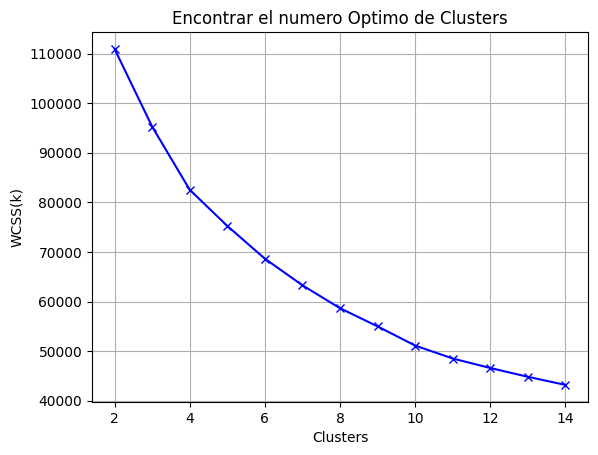

In [43]:
plt.plot(range_values, scores_1, 'bx-')
plt.title('Encontrar el numero Optimo de Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.grid(True)
plt.show()

# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster.
# Elijamos pues un número de clusters igual a 8.

# BUSCAMOS EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL METODO DE COEFICIENTE DE SILUETA

In [44]:
# Definimos la lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Definimos el rango de valores de clusters que queremos probar
range_values = range(2, 15)

for i in range_values:
    kmeans1 = KMeans(n_clusters=i, n_init = 10)
    kmeans1 = kmeans1.fit(pca_df)
    # Calculamos las etiquetas de los clusters para cada muestra
    labels = kmeans1.predict(pca_df)
    # Calculamos el coeficiente de silueta
    silhouette_scores.append(silhouette_score(pca_df, labels))

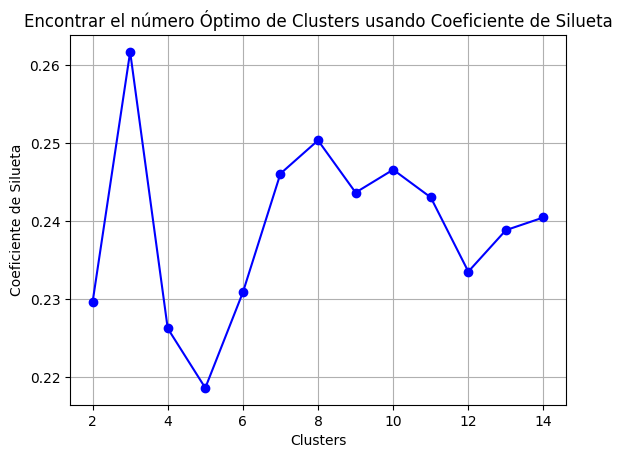

In [45]:
# Graficamos los resultados
plt.plot(range_values, silhouette_scores, 'bo-')
plt.title('Encontrar el número Óptimo de Clusters usando Coeficiente de Silueta')
plt.xlabel('Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()


#Indica 3 clusters

In [46]:
km = KMeans(n_clusters = 3)
y = km.fit_predict(pca_df)
silhouette_score(pca_df, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.26243381573215296

In [47]:
scores_1 = [] # Definimos la lista

range_values = range(2, 15) # Definimos el rango de valores

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init = 10)
  kmeans.fit(creditcard_df_scaleddf)
  scores_1.append(kmeans.inertia_) # WCSS

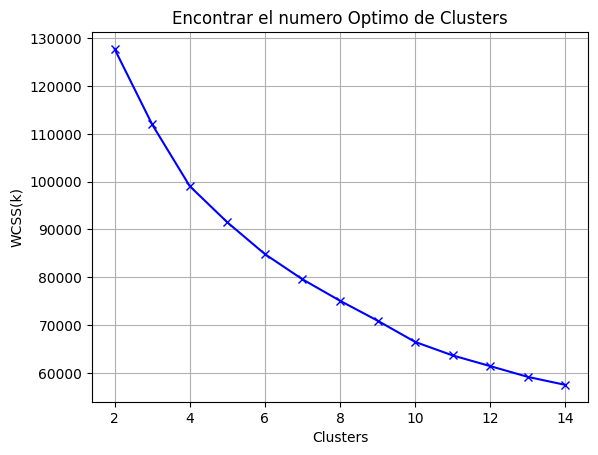

In [48]:
plt.plot(range_values, scores_1, 'bx-')
plt.title('Encontrar el numero Optimo de Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.grid(True)
plt.show()

In [49]:
creditcard_df_scaleddf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [50]:
# Realizamos el mismo procedimiento pero sin PCA
silhouette_scores = []
range_values = range(2, 15)

for i in range_values:
    kmeans1 = KMeans(n_clusters=i, n_init = 10)
    kmeans1 = kmeans1.fit(creditcard_df_scaleddf)
    # Calculamos las etiquetas de los clusters para cada muestra
    labels = kmeans1.predict(creditcard_df_scaleddf)
    # Calculamos el coeficiente de silueta
    silhouette_scores.append(silhouette_score(creditcard_df_scaleddf, labels))

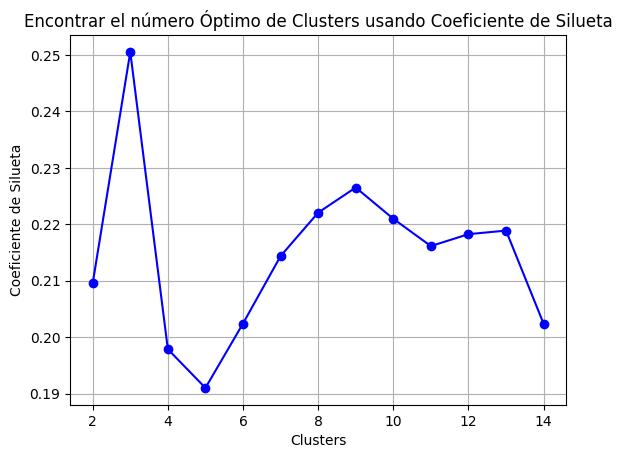

In [51]:
plt.plot(range_values, silhouette_scores, 'bo-')
plt.title('Encontrar el número Óptimo de Clusters usando Coeficiente de Silueta')
plt.xlabel('Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

In [52]:
# Realizamos el mismo procedimiento pero sin PCA
km = KMeans(n_clusters = 3, n_init = 10)
y = km.fit_predict(creditcard_df_scaleddf)
silhouette_score(creditcard_df_scaleddf, y)

0.25059934300557285

Observamos que con PCA se obtienen mejores resultados

# METODO DE DENDROGRAMA

METODO DE AGGLOMERATIVEN HIERARCHICAL CLUSTERING

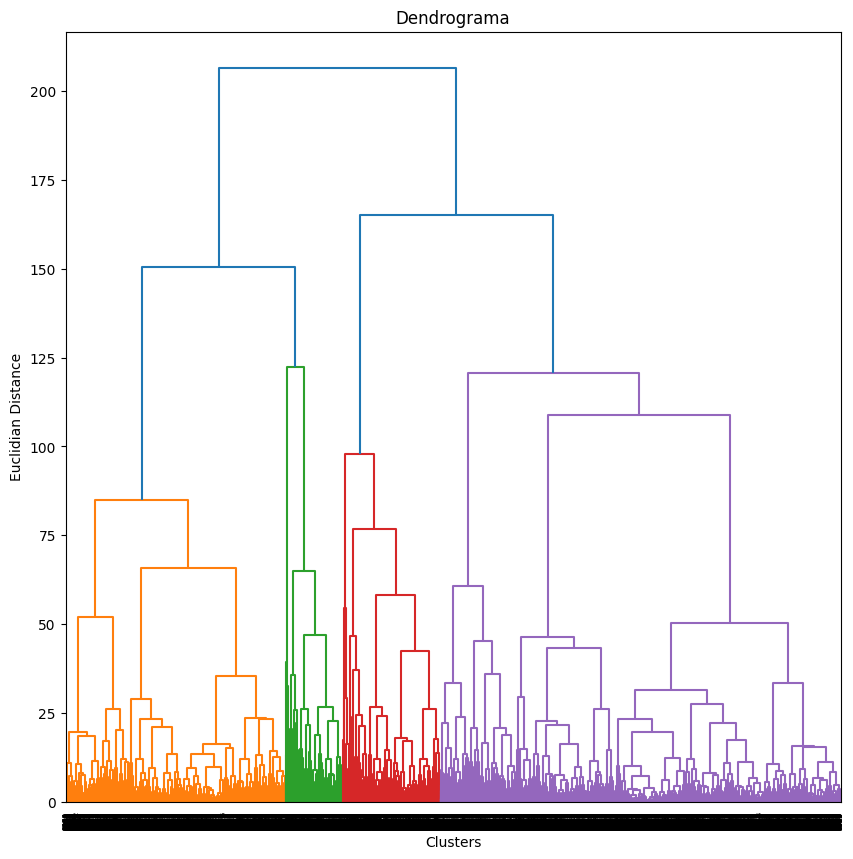

In [53]:
plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_df, method='ward')) # utilizamos el método ward
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [54]:
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward' )
y_hc = hc.fit_predict(pca_df)
silhouette_score(pca_df, y_hc)

#Segun la grafica podemos ver que 3 clusters son los que mejor se ajusta a los datos

0.20325069071062354

In [55]:
hc = AgglomerativeClustering(n_clusters = 8, metric='euclidean', linkage='ward' )
y_hc = hc.fit_predict(pca_df)
silhouette_score(pca_df, y_hc)

# Probamos con 8 clusters y observamos que tiene mejor ajuste

0.20554664348851498

SIN PCA

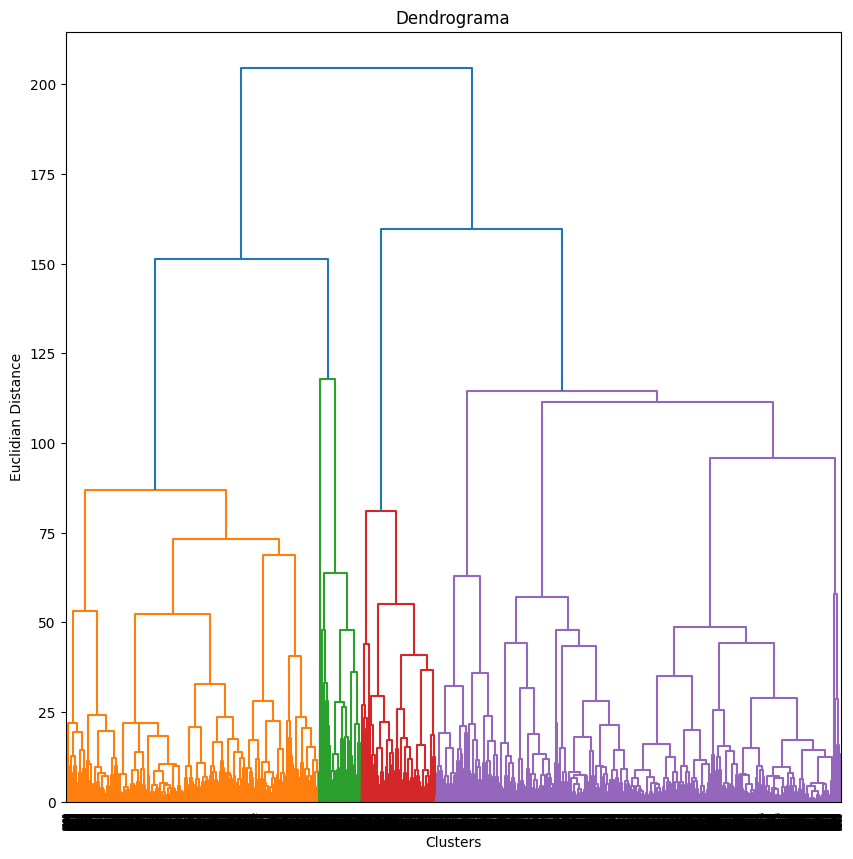

In [56]:
plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(creditcard_df_scaleddf, method='ward')) # utilizamos el método ward
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [57]:
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward' )
y_hc = hc.fit_predict(creditcard_df_scaleddf)
silhouette_score(creditcard_df_scaleddf, y_hc)

# Segun la grafica podemos ver que 2 clusters son los que mejor se ajusta a los datos y obtienen el resultado mas alto
#Observamos que este metodo es el menos preciso o esta mas alejado de los datos

0.1775448235536517

# UTILIZANDO EL METODO DE DBSCAN

In [58]:
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

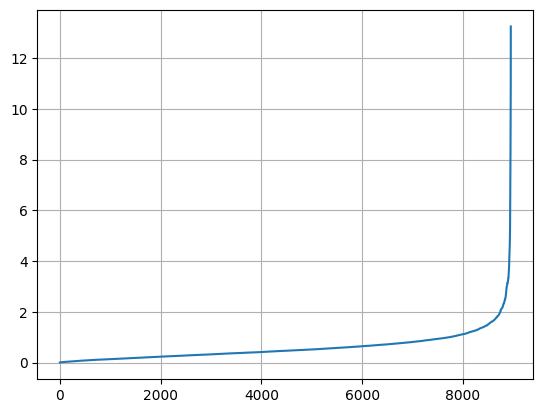

In [59]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(True)
plt.plot(distances)


In [60]:
eps_values = np.arange(1.0, 2.0, 0.10)
min_samples = np.arange(3,12)

In [61]:
from itertools import product

In [62]:
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for i in dbscan_params:
  y_dbscan = DBSCAN(eps=i[0], min_samples=i[1]).fit_predict(pca_df)
  try:
    sil_score.append(silhouette_score(pca_df, y_dbscan))
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))


In [63]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [64]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', index='Min_samples', columns='Eps')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', index='Min_samples', columns='Eps')

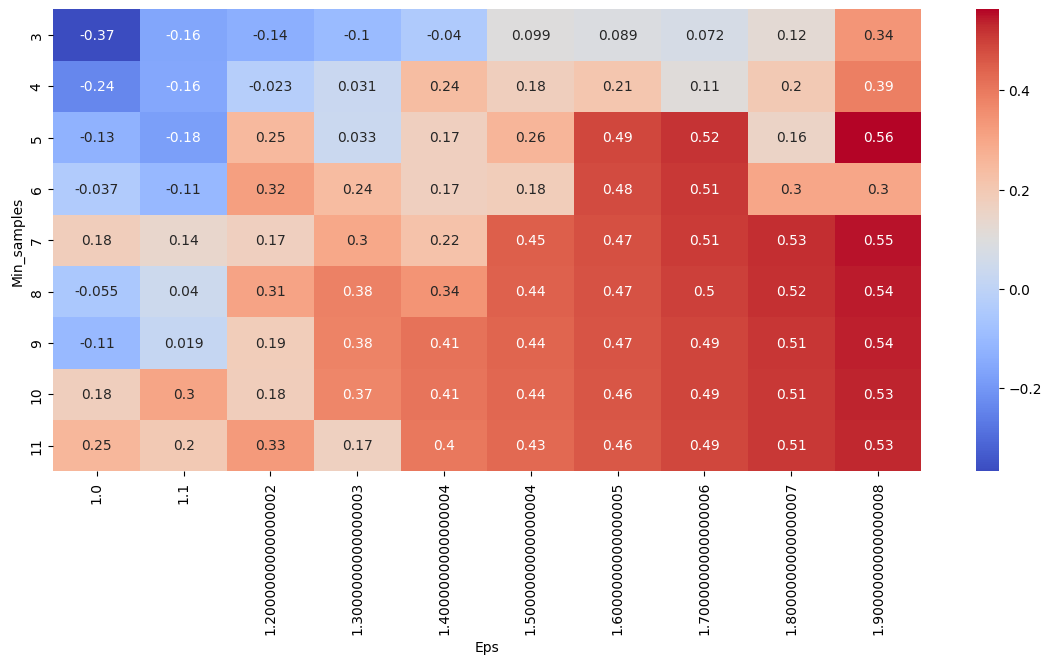

In [65]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.show()


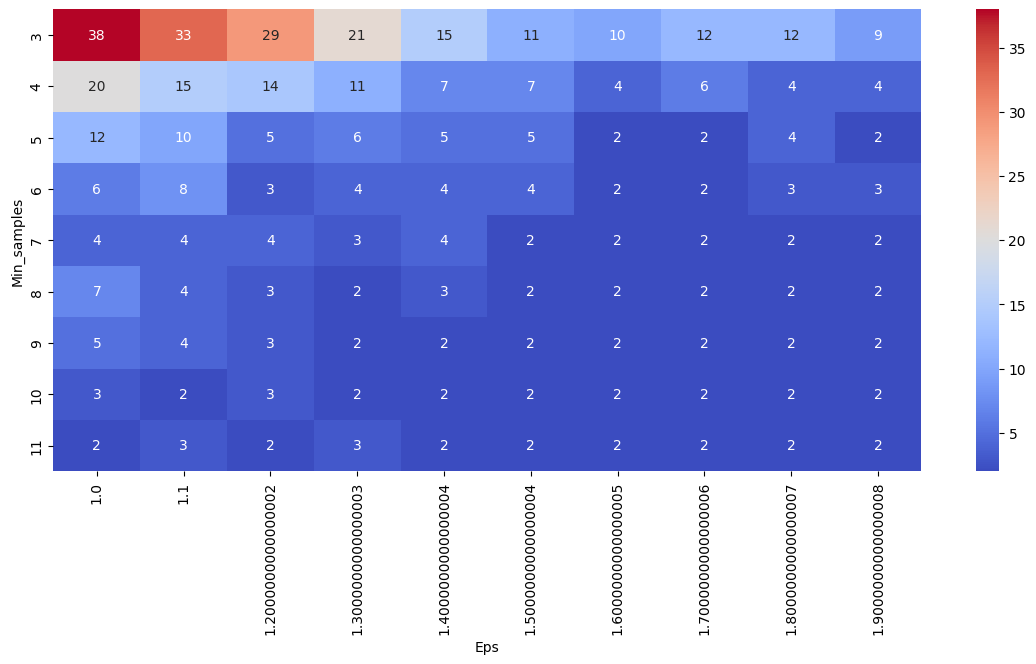

In [66]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.show()

In [67]:
dbscan_train = DBSCAN(eps=1.2, min_samples=6)
y_dbscan = dbscan_train.fit_predict(pca_df)
print(silhouette_score(pca_df,y_dbscan ))


0.3184171280478612


#APLICAR EL MÉTODO DE K-MEANS

#Sin PCA

In [68]:
kmeans = KMeans(n_clusters = 8) # Inicializamos el modelo con 8 clusters
kmeans.fit(creditcard_df_scaled) # Entrenamos el modelo
labels = kmeans.labels_ # Obtenemos los labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
kmeans.cluster_centers_.shape # Obtenemos los centroides de los clusters

(8, 17)

In [70]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns]) # Creamos un dataframe con los centroides
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.670578,0.390676,-0.221613,-0.157996,-0.233802,1.997826,-0.482408,-0.214009,-0.422370,1.910244,1.916907,-0.271681,1.014337,0.813195,0.547413,-0.391364,0.071452
1,-0.358067,0.332433,-0.029523,-0.240735,0.372267,-0.362520,0.997180,-0.381259,1.208814,-0.471903,-0.359553,0.195129,-0.256957,-0.213062,-0.029777,0.314763,0.256155
2,-0.118892,0.403177,0.563360,0.683578,0.076002,-0.331953,0.997145,1.913869,0.212455,-0.415090,-0.331883,0.658778,0.458613,0.162037,-0.154479,0.453930,0.272847
3,0.008127,0.404676,-0.354562,-0.239299,-0.398613,-0.099255,-0.842511,-0.385174,-0.750951,0.094091,-0.035191,-0.478244,-0.305756,-0.251907,-0.013141,-0.454892,0.274501
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
6,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
7,-0.700959,-2.136796,-0.309925,-0.234455,-0.301964,-0.322638,-0.553187,-0.440411,-0.438930,-0.521625,-0.376608,-0.418252,-0.174983,-0.202269,-0.256829,0.283361,0.199386


In [71]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers) # Aplicamos la transformación inversa para obtener los centroides de los clusters
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns]) # Creamos un dataframe con los centroides
cluster_centers

# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5041.641553,0.969818,529.725210,330.197072,199.643541,5168.404620,0.296737,0.138615,0.196577,0.517403,16.330306,7.956867,8185.022186,4087.263771,2139.928792,0.039248,11.612940
1,819.189116,0.956021,940.127788,192.866563,747.704320,218.649226,0.890567,0.088721,0.844851,0.040712,0.795139,19.560020,3559.533830,1116.351146,794.813281,0.245777,11.860119
2,1317.011166,0.972780,2206.831496,1727.036581,479.794915,282.750088,0.890553,0.773402,0.448872,0.052080,0.983972,31.084595,6163.069700,2202.224090,504.199929,0.286481,11.882458
3,1581.391489,0.973135,245.677415,195.249906,50.606424,770.728639,0.152210,0.087553,0.065990,0.153973,3.008677,2.822487,3381.983611,1003.898838,833.582727,0.020667,11.884671
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
6,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
7,105.487697,0.371083,341.045987,203.290590,138.005649,302.284771,0.268330,0.071075,0.189995,0.030762,0.678752,4.313659,3857.790425,1147.596176,265.677493,0.236593,11.784148


In [72]:
labels.shape

(8950,)

In [73]:
labels.min()

0

In [74]:
labels.max()

7

In [75]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 4, 3, ..., 6, 6, 6], dtype=int32)

In [76]:
# Concatenamos las etiquetas de los clusters con el dataset riginal

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'Cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [77]:
creditcard_df_cluster.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

In [78]:
# Visualizamos con pairplot para cada variable y cluster

plt.figure(figsize=(20,20))
sns.pairplot(data = creditcard_df_cluster, hue='Cluster', palette='coolwarm')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

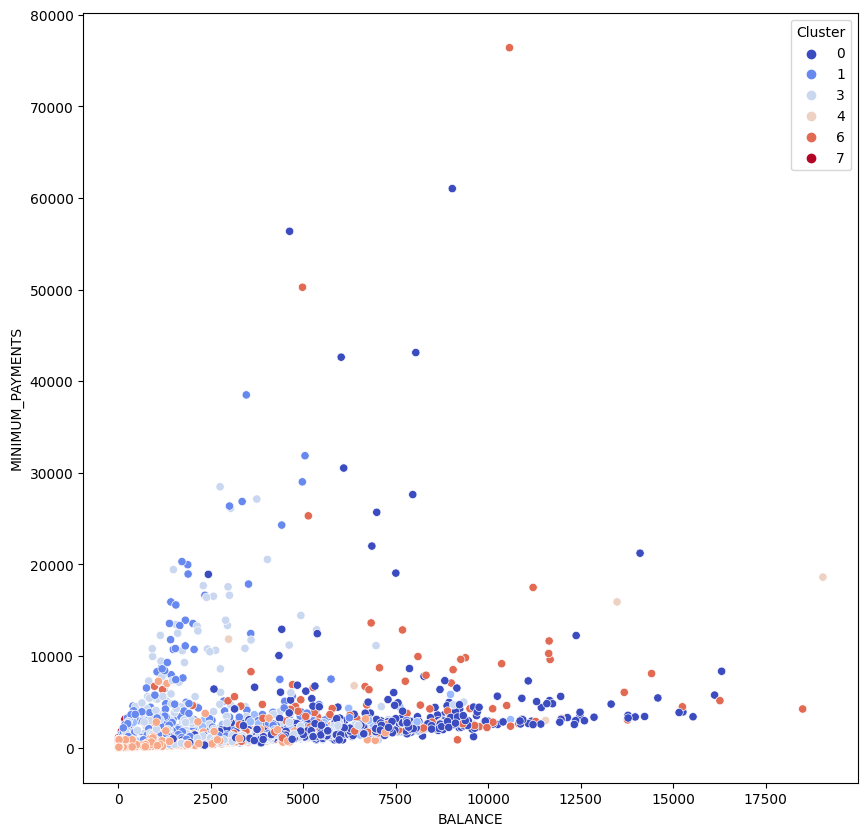

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=creditcard_df_cluster, x='BALANCE', y='MINIMUM_PAYMENTS', hue='Cluster', palette='coolwarm')
plt.show()

#Con PCA

In [80]:
kmeans1 = KMeans(n_clusters = 8) # Inicializamos el modelo con 8 clusters
kmeans1.fit(pca_df) # Entrenamos el modelo
labels1 = kmeans1.labels_ # Obtenemos los labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
kmeans1.cluster_centers_.shape # Obtenemos los centroides de los clusters

(8, 9)

In [82]:
centroides = kmeans1.cluster_centers_
centroides

array([[ 2.89799142, -0.40557557,  0.12505246,  0.16904964, -0.96339926,
        -0.13665344, -0.56319304,  0.05156989, -0.42366481],
       [-1.21608005,  0.23817223,  0.1794222 ,  0.65959756, -0.37135737,
        -0.01397078,  0.37740326,  0.11702701,  0.36950168],
       [ 0.66512222, -1.27668643, -1.11472383, -0.31199496,  0.26918454,
        -0.29957787,  0.21211249, -0.01867965,  0.18170269],
       [12.18333765,  2.27658352,  3.90171412,  0.3916438 ,  1.48661305,
         1.66335602,  2.35142616, -0.05378014,  1.18478475],
       [-1.24394342, -0.20035662,  0.30982235, -1.67507788,  0.08772973,
         2.39749225, -0.98960491, -0.24813668,  0.47217681],
       [-1.20209131, -1.09325867,  1.38390072, -0.12022003,  1.06655416,
        -0.4363708 , -0.08356317, -0.33757935, -0.90236446],
       [ 0.56208427,  2.00552092, -2.81095745,  4.51237292,  4.26412498,
         2.60497099, -1.57030294,  4.95649001, -1.83079683],
       [-0.3011984 ,  3.98021253, -0.4507216 , -0.5957158 ,  0

In [83]:
labels1


array([1, 7, 0, ..., 4, 4, 4], dtype=int32)

In [84]:
creditcard_df_cluster1 = creditcard_df.copy()
creditcard_df_cluster1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [85]:
creditcard_df_cluster1['Cluster'] = labels1
creditcard_df_cluster1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


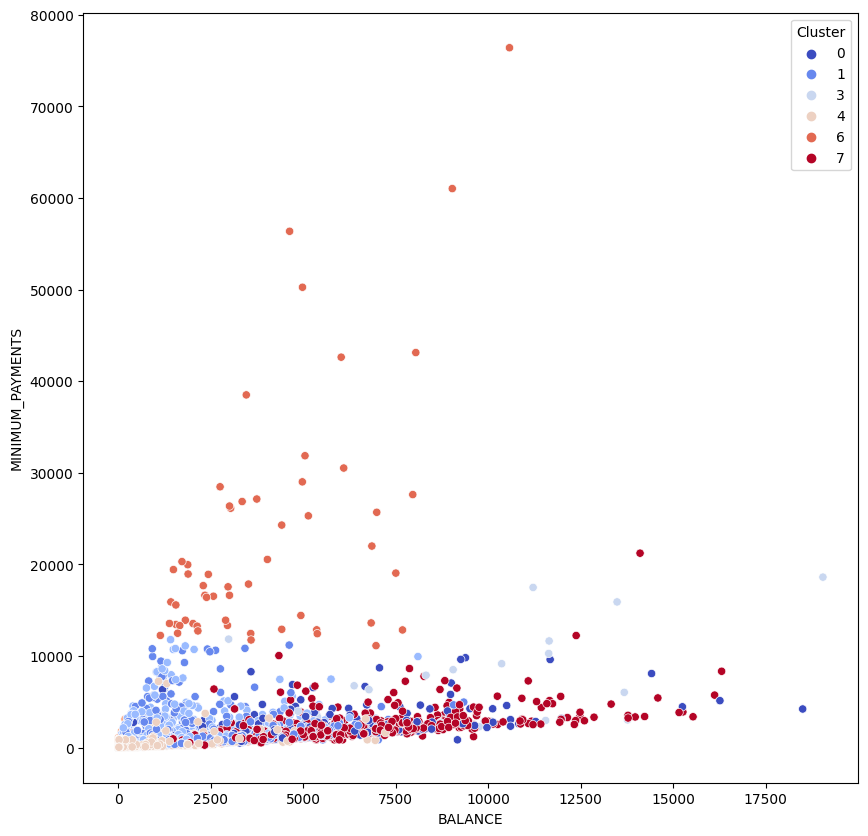

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=creditcard_df_cluster1, x='BALANCE', y='MINIMUM_PAYMENTS', hue='Cluster', palette='coolwarm')
plt.show()

In [87]:
kmeans1 = KMeans(n_clusters = 3) # Inicializamos el modelo con 3 clusters
kmeans1.fit(pca_df) # Entrenamos el modelo
labels1 = kmeans1.labels_ # Obtenemos los labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
creditcard_df_cluster1 = pd.concat([creditcard_df, pd.DataFrame({'Cluster': labels1})], axis = 1)
creditcard_df_cluster1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


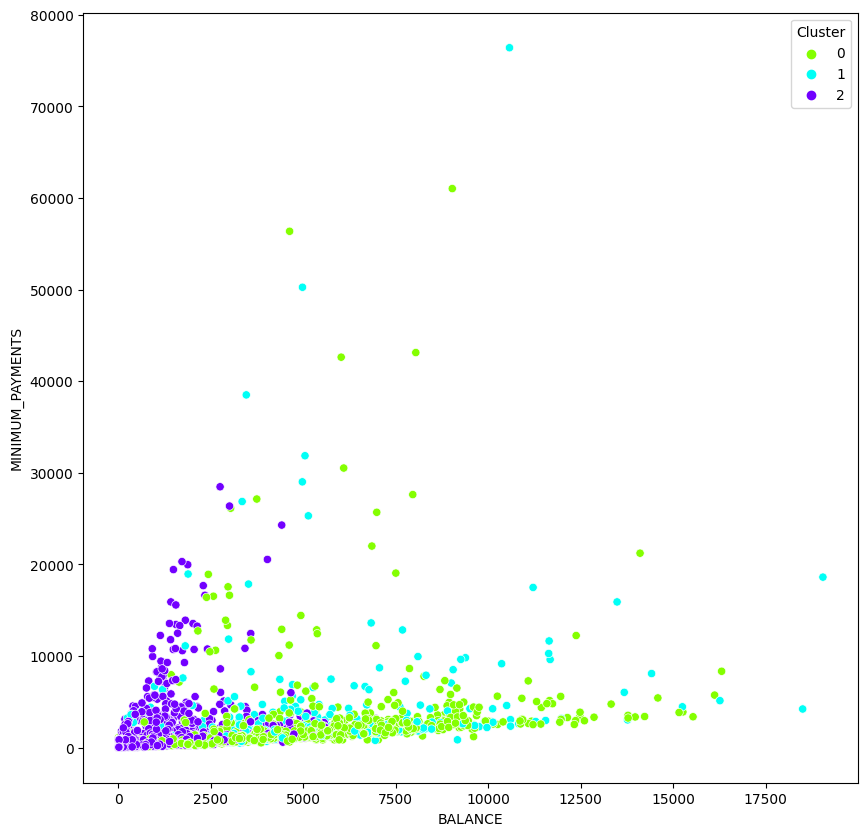

In [113]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=creditcard_df_cluster1, x='BALANCE', y='MINIMUM_PAYMENTS', hue='Cluster', palette=sns.color_palette('hsv', 3))
plt.show()

In [90]:
creditcard_df_cluster[creditcard_df_cluster['Cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,0
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,0
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12,0
8795,1478.089943,0.800000,245.01,245.01,0.00,4377.526126,0.100000,0.100000,0.000000,0.600000,22,1,2500.0,3168.779374,966.611926,0.000000,10,0
8813,3335.053583,0.700000,0.00,0.00,0.00,5823.467109,0.000000,0.000000,0.000000,0.300000,3,0,7000.0,931.371718,1006.983314,0.000000,10,0
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,0


In [91]:
creditcard_df_cluster1[creditcard_df_cluster1['Cluster'] == 2]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,2


#UTILIZANDO ENCODERS

In [92]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD



In [93]:
encoding_dim = 7 # Asignamos la nueva dimensión de la codificación (de 17 a 7)

input_df = Input(shape = (17, )) # Creamos la entrada

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

# Capa de codificación

#se crea la primera capa del autoencoder. Es una capa densa (totalmente conectada) que toma la capa de entrada y la reduce a la nueva
#dimensión de codificación. Se utiliza la función de activación ReLU para introducir no linealidad en la capa.
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) # Se crea la segunda capa
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x) # Se crea la capa de salida con la dimensión codificada de 10

#Se crea el modelo del autoencoder utilizando el objeto Model de Keras, especificando la capa de entrada y la capa de salida (decodificada).
autoencoder = Model(input_df, decoded)

#se crea un modelo separado llamado "encoder", que mapea los datos de entrada a su representación codificada.
encoder = Model(input_df, encoded)

# se compila el autoencoder especificando el optimizador 'adam' y la función de pérdida 'mean_squared_error'
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [94]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [95]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 25, batch_size = 128, verbose = 1)

Epoch 1/25
70/70 [==============================] - 7s 4ms/step - loss: 0.5416
Epoch 2/25
70/70 [==============================] - 0s 4ms/step - loss: 0.3071
Epoch 3/25
70/70 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 4/25
70/70 [==============================] - 0s 4ms/step - loss: 0.2294
Epoch 5/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1952
Epoch 6/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1709
Epoch 7/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1506
Epoch 8/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1477
Epoch 9/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1280
Epoch 10/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1238
Epoch 11/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1181
Epoch 12/25
70/70 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 13/25
70/70 [==============================

In [ ]:
# autoencoder.save_weights('autoencoder.h5') # Guardamos el modelo

In [96]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 0s 1ms/step


In [97]:
pred.shape

(8950, 10)

In [98]:
pred

array([[0.6541268 , 0.        , 0.        , ..., 1.0538372 , 0.40592214,
        0.        ],
       [0.8411229 , 0.        , 0.        , ..., 1.0786476 , 0.        ,
        0.        ],
       [0.6726067 , 0.        , 0.        , ..., 0.6810946 , 0.3866149 ,
        0.        ],
       ...,
       [2.1106415 , 0.        , 0.        , ..., 1.590234  , 3.2963295 ,
        0.        ],
       [2.796437  , 0.        , 0.        , ..., 2.16348   , 2.7180119 ,
        0.        ],
       [2.6663952 , 0.        , 0.        , ..., 0.2198446 , 2.7343392 ,
        0.        ]], dtype=float32)

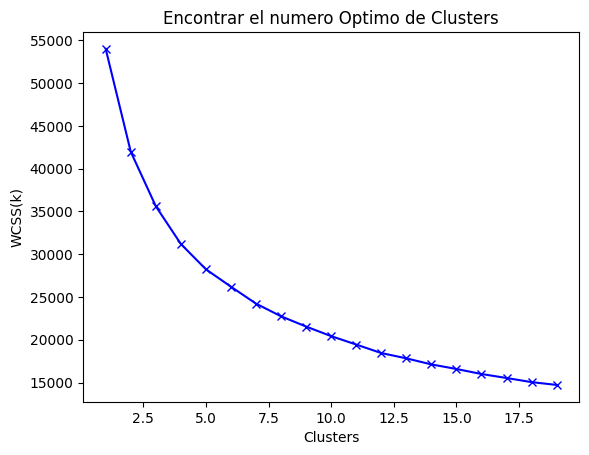

In [101]:
scores_2 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init=10)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(range_values, scores_2, 'bx-')
plt.title('Encontrar el numero Optimo de Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()



In [103]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels  = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
y_kmeans

array([3, 3, 3, ..., 2, 0, 0], dtype=int32)

In [106]:
labels

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [105]:
kmeans.cluster_centers_

array([[2.6553776 , 0.        , 0.        , 0.        , 1.3225849 ,
        1.4068198 , 0.58399665, 1.1637344 , 0.9556049 , 0.        ],
       [2.4428983 , 0.        , 0.        , 0.        , 6.6490326 ,
        6.496793  , 5.7706485 , 4.932439  , 4.293     , 0.        ],
       [0.7000252 , 0.        , 0.        , 0.        , 0.8423016 ,
        1.8800333 , 1.7290492 , 1.6821406 , 1.94417   , 0.        ],
       [0.8305639 , 0.        , 0.        , 0.        , 0.3991471 ,
        0.722167  , 0.41947883, 1.0804393 , 0.593405  , 0.        ]],
      dtype=float32)

In [107]:
kmeans.cluster_centers_.shape

(4, 10)

In [108]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'Cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


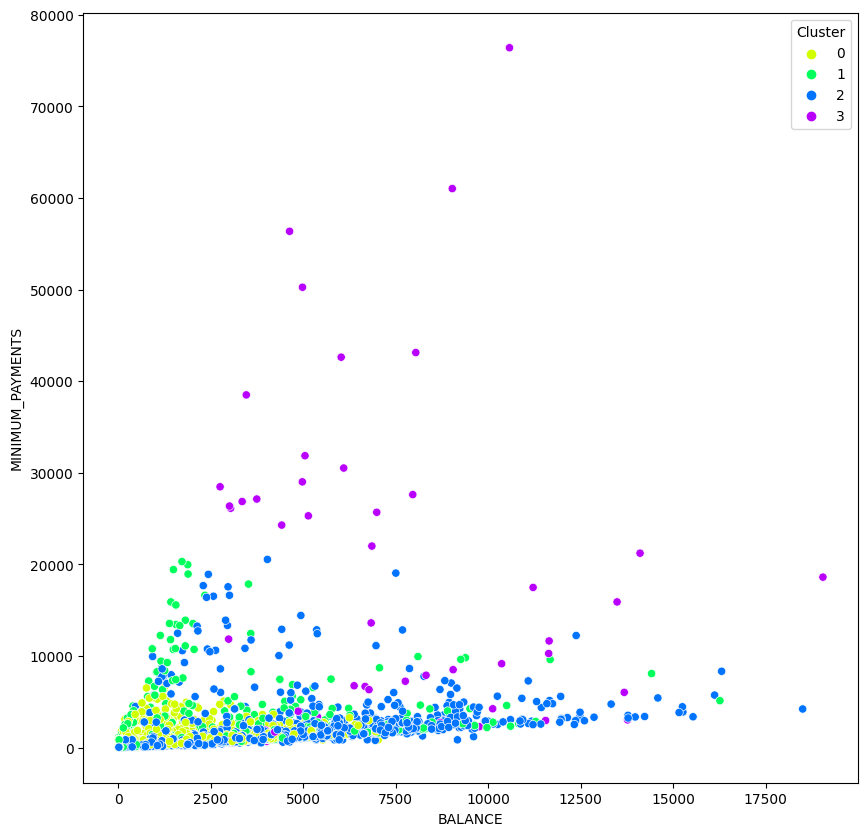

In [115]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_cluster_dr, x='BALANCE', y='MINIMUM_PAYMENTS', hue='Cluster', palette=sns.color_palette('hsv', 4))
plt.show()

In [117]:
# Utilizo PCA para reducir a dos componentes
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns = ['PCA1', 'PCA2'] )
pca_df

,PCA1,PCA2
0,-1.295380,-0.176351
1,-0.936874,0.615449
2,-0.210615,0.210377
3,-0.648536,0.135362
4,-0.900522,0.124458
...,...,...
8945,1.423124,-0.923634
8946,1.123545,-0.335033
8947,0.660930,-0.577128
8948,0.238904,0.527096


In [119]:
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster': labels})], axis=1)
pca_df.head()

,PCA1,PCA2,Cluster
0,-1.295380,-0.176351,0
1,-0.936874,0.615449,0
2,-0.210615,0.210377,0
3,-0.648536,0.135362,0
4,-0.900522,0.124458,0


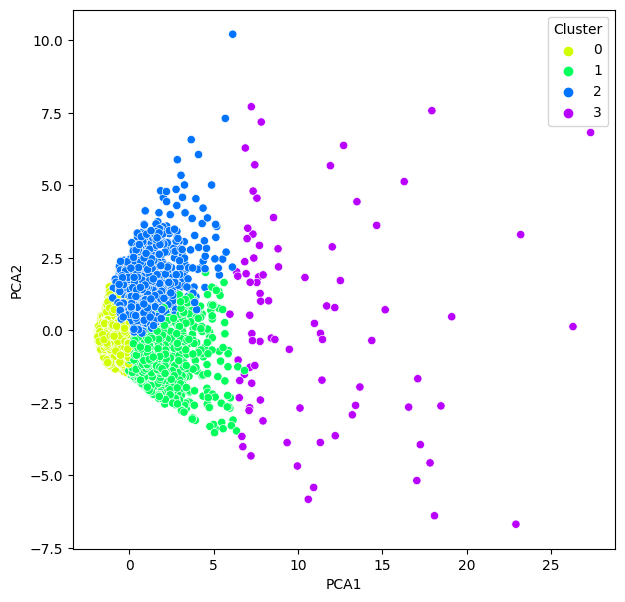

In [121]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Cluster', data = pca_df, palette = sns.color_palette("hsv", 4))
plt.show()


In [124]:
pca_df[pca_df['Cluster'] == 0]

,PCA1,PCA2,Cluster
0,-1.295380,-0.176351,0
1,-0.936874,0.615449,0
2,-0.210615,0.210377,0
3,-0.648536,0.135362,0
4,-0.900522,0.124458,0
...,...,...,...
8900,-0.056540,-0.460530,0
8911,-0.084947,-0.647074,0
8919,-0.290308,0.015216,0
8924,-0.266373,-0.029474,0


In [123]:
#Verificamos cantidad de Cluster que sean iguales
df_cluster_dr[df_cluster_dr['Cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8900,25.302553,0.714286,176.25,0.00,176.25,0.000000,0.714286,0.000000,0.571429,0.000000,0,5,1500.0,191.780690,99.580177,0.000000,7,0
8911,30.709172,0.285714,693.42,0.00,693.42,0.000000,0.714286,0.000000,0.571429,0.000000,0,7,1000.0,1154.520085,15.853873,0.000000,7,0
8919,14.524779,0.333333,152.00,152.00,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,864.206542,0.000000,6,0
8924,7.336804,0.333333,74.00,74.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,3000.0,214.921009,44.254787,0.000000,6,0


#CONCLUSIONES

- Se utilizaron varios metodos para escoger la cantidad optima de Cluster, se crearon diferentes df con varios Cluster según recomendaciones, necesidades y preferencias del Departamento de Marketing.